In [ ]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the model in your Google Drive
model_path_in_drive = '/content/drive/MyDrive/9a_generator_model_012000.h5'

# Destination path where you want to save the model in Colab
destination_path_in_colab = '/content/model.h5'

# Copy the model from Google Drive to Colab
shutil.copyfile(model_path_in_drive, destination_path_in_colab)

# Verify if the model is copied successfully
if os.path.exists(destination_path_in_colab):
    print("Model is successfully copied to Colab.")
else:
    print("Error copying model to Colab.")


Mounted at /content/drive
Model is successfully copied to Colab.


In [ ]:
import shutil
import os

# Path to the folder in your Google Drive
folder_path_in_drive = '/content/drive/MyDrive/quick_check'

# Destination path where you want to save the folder in Colab
destination_path_in_colab = '/content/Data_me5'

# Copy the folder from Google Drive to Colab
shutil.copytree(folder_path_in_drive, destination_path_in_colab)

# Verify if the folder is copied successfully
if os.path.exists(destination_path_in_colab):
    print("Data_me folder is successfully copied to Colab.")
else:
    print("Error copying Data_me folder to Colab.")


Data_me folder is successfully copied to Colab.


Number of images loaded: 5
Loaded:  (5, 128, 128, 3)


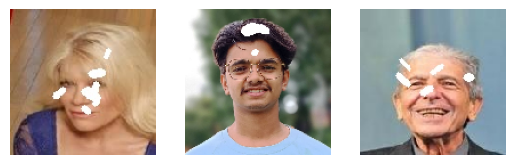

In [ ]:



import os
from keras.preprocessing.image import img_to_array, load_img
from PIL import Image
# import numpy as np
from matplotlib import pyplot
# from numpy import asarray
image_horizontal=128
image_vertical=128

def load_and_resize_images(folder_path, size=(image_horizontal, image_vertical)):
    src_list = []
    for filename in os.listdir(folder_path):
      masked_img_path = os.path.join(folder_path, filename)
      masked_pixels = load_img(masked_img_path, target_size=size)
      masked_pixels = img_to_array(masked_pixels)
      src_list.append(masked_pixels)

    src_image=asarray(src_list)
    return src_image


# Example usage
folder_path = "/content/Data_me5"
images = load_and_resize_images(folder_path)

# Check the number of images loaded
print(f"Number of images loaded: {len(images)}")


print('Loaded: ', images.shape)
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(images[i].astype('uint8'))





1/1 [==============================] - 0s 320ms/step


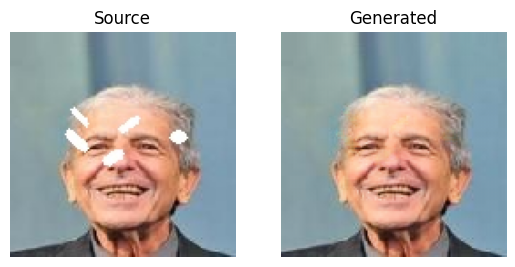

Generated image saved as 'generated_image.jpg'


In [ ]:


import os
import cv2
import numpy as np
from keras.models import load_model
from numpy.random import randint
import matplotlib.pyplot as plt
from numpy import vstack

model = load_model('model.h5')


def plot_images(src_img, gen_img):
    images = vstack((src_img, gen_img))
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ['Source', 'Generated']
    # plot images row by row
    for i in range(len(images)):
        # define subplot
        plt.subplot(1, 2, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(images[i])
        # show title
        plt.title(titles[i])
    plt.show()


def preprocess_data(data):
    # load compressed arrays
    # unpack arrays
    X1 = data[0]
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5

    return [X1, ]


data = [images, ]

testing_dataset = preprocess_data(data)

[X1, ] = testing_dataset
# select random example
ix = randint(0, len(X1), 1)
image = X1[ix]
# generate image from source
gen_image = model.predict(image)
plot_images(image, gen_image)

# Ask user if they want to save the generated image in JPG format
save_as_jpg = True

if save_as_jpg == True:
    # Convert the generated image to JPG format
    gen_image_jpg = ((gen_image[0] + 1) * 127.5).astype(np.uint8)  # Rescale and convert to uint8
    # Rearrange channels from BGR to RGB
    gen_image_jpg = cv2.cvtColor(gen_image_jpg, cv2.COLOR_BGR2RGB)
    cv2.imwrite("generated_image.jpg", gen_image_jpg)  # Save the image as JPG
    print("Generated image saved as 'generated_image.jpg'")
else:
    print("Invalid input. Please enter 'yes' or 'no'.")



